In [2]:
!pip install pandas numpy matplotlib scikit-learn

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/fb/4f/4a4372b2e24439f559b73318683486831d75e59544ae02bf8dec8dd6f48b/pandas-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pandas-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/71/3c/3b1981c6a1986adc9ee7db760c0c34ea5b14ac3da9ecfcf1ea2a4ec6c398/numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c2/da/a5622266952ab05dc3995d77689cba600e49ea9d6c51d469c077695cb719/matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.m

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("../../RibosomeProfiler/sample_data/annotated_read_df_cleaned.csv")

In [5]:
df['transcript_id'].value_counts()

transcript_id
ENST00000369155.3    33182
ENST00000369167.2    33021
ENST00000545683.1    32296
ENST00000612061.1    30400
ENST00000618193.1    30396
                     ...  
ENST00000478323.1        7
ENST00000532117.1        5
ENST00000624892.1        3
ENST00000624855.1        2
ENST00000623045.1        1
Name: count, Length: 6313, dtype: int64

In [6]:
df_subset = df[df['transcript_id'] == 'ENST00000369155.3']

In [7]:
df_subset.describe()

,Unnamed: 0,read_length,reference_start,count,a_site,cds_start,cds_end,transcript_length
count,3.318200e+04,33182.000000,33182.000000,33182.000000,33182.000000,33182.0,33182.0,33182.0
mean,4.004034e+06,27.277590,200.754927,74.343680,215.754927,1801.0,2561.0,760.0
std,9.578963e+03,2.554291,107.909313,125.079564,107.909313,0.0,0.0,0.0
min,3.987444e+06,15.000000,0.000000,1.000000,15.000000,1801.0,2561.0,760.0
25%,3.995739e+06,27.000000,147.000000,3.000000,162.000000,1801.0,2561.0,760.0
50%,4.004034e+06,28.000000,188.000000,19.000000,203.000000,1801.0,2561.0,760.0
75%,4.012330e+06,29.000000,267.000000,78.000000,282.000000,1801.0,2561.0,760.0
max,4.020625e+06,50.000000,2124.000000,544.000000,2139.000000,1801.0,2561.0,760.0


In [8]:
df_subset.head()

,Unnamed: 0,read_name,read_length,reference_name,reference_start,count,a_site,transcript_id,cds_start,cds_end,transcript_length,mRNA_category
3987444,3987444,read89403_x169,28,ENST00000369155.3|ENSG00000184678.10|OTTHUMG00...,0,169,15,ENST00000369155.3,1801,2561,760,five_leader
3987445,3987445,read89403_x169,28,ENST00000369155.3|ENSG00000184678.10|OTTHUMG00...,0,169,15,ENST00000369155.3,1801,2561,760,five_leader
3987446,3987446,read89403_x169,28,ENST00000369155.3|ENSG00000184678.10|OTTHUMG00...,0,169,15,ENST00000369155.3,1801,2561,760,five_leader
3987447,3987447,read89403_x169,28,ENST00000369155.3|ENSG00000184678.10|OTTHUMG00...,0,169,15,ENST00000369155.3,1801,2561,760,five_leader
3987448,3987448,read89403_x169,28,ENST00000369155.3|ENSG00000184678.10|OTTHUMG00...,0,169,15,ENST00000369155.3,1801,2561,760,five_leader


In [9]:
def create_profile_df(df, transcript_id):
    df_subset = df[df['transcript_id'] == transcript_id]
    profile = []
    for g in df_subset.groupby('a_site'):
        profile.append([g[0], g[1].shape[0]])
    for i in range(0, df_subset['a_site'].max() + 1):
        if i not in df_subset['a_site'].values:
            profile.append([i, 0])

    profile = sorted(profile, key=lambda x: x[0])

    profile_df = pd.DataFrame(profile, columns=['a_site', 'count'])
    return profile_df


In [10]:
def proportion_of_codon(profile_df):
    proportion = []
    count = 0
    for i in range(0, profile_df['a_site'].max()-2, 3):
        f1 = profile_df[profile_df['a_site'] == i]['count'].values[0]
        f2 = profile_df[profile_df['a_site'] == i + 1]['count'].values[0]
        f3 = profile_df[profile_df['a_site'] == i + 2]['count'].values[0]
        if sum([f1, f2, f3]) == 0:
            continue
        count += 1
        p1 = f1 / (f1 + f2 + f3) 
        p2 = f2 / (f1 + f2 + f3)
        p3 = f3 / (f1 + f2 + f3)
        proportion.append([count, p1, p2, p3])
    return proportion


In [11]:
# get proporitons for each transcript in a merged df

# get top ten occuring transcripts
transcript_ids = df['transcript_id'].value_counts().index.tolist()

merged = pd.DataFrame()

for transcript_id in transcript_ids[:10]:
    profile_df = create_profile_df(df, transcript_id)
    proportion = proportion_of_codon(profile_df)
    proportion_df = pd.DataFrame(proportion, columns=['count', 'p1', 'p2', 'p3'])
    proportion_df['transcript_id'] = transcript_id
    merged = pd.concat([merged, proportion_df])
print(merged)


     count        p1        p2        p3      transcript_id
0        1  0.719902  0.164619  0.115479  ENST00000369155.3
1        2  0.932584  0.048689  0.018727  ENST00000369155.3
2        3  0.629630  0.148148  0.222222  ENST00000369155.3
3        4  0.982063  0.008969  0.008969  ENST00000369155.3
4        5  0.990991  0.009009  0.000000  ENST00000369155.3
..     ...       ...       ...       ...                ...
111    112  0.000000  0.000000  1.000000  ENST00000621520.1
112    113  0.000000  0.000000  1.000000  ENST00000621520.1
113    114  0.000000  0.000000  1.000000  ENST00000621520.1
114    115  0.000000  1.000000  0.000000  ENST00000621520.1
115    116  0.000000  1.000000  0.000000  ENST00000621520.1

[1450 rows x 5 columns]


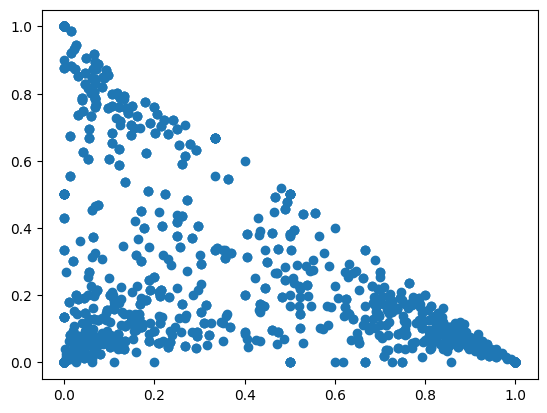

In [12]:
# plot p1 vs p2
import matplotlib.pyplot as plt

plt.scatter(merged['p1'], merged['p2'])

In [49]:
# k means clustering of p1 and p2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(merged[['p1', 'p2']])

merged['kmeans_cluster'] = kmeans.labels_

merged.head()

/home/jack/projects/Metric-Analysis/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,count,p1,p2,p3,transcript_id,cluster,kmeans_cluster
0,1,0.719902,0.164619,0.115479,ENST00000369155.3,0,1
1,2,0.932584,0.048689,0.018727,ENST00000369155.3,0,1
2,3,0.629630,0.148148,0.222222,ENST00000369155.3,0,1
3,4,0.982063,0.008969,0.008969,ENST00000369155.3,0,1
4,5,0.990991,0.009009,0.000000,ENST00000369155.3,0,1


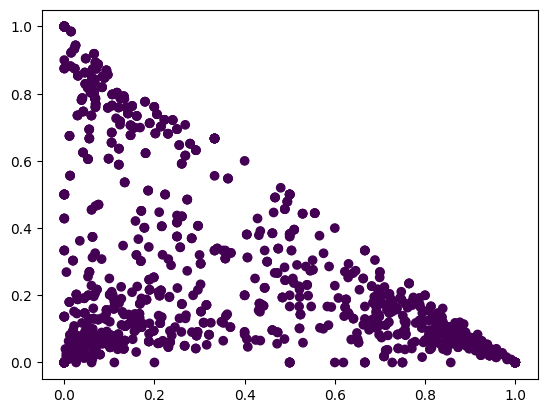

In [50]:
# plot p1 vs p2 with cluster

plt.scatter(merged['p1'], merged['p2'], c=merged['cluster'])



In [16]:
# get centroids of clusters

centroids = kmeans.cluster_centers_
print(centroids)

[[0.09465816 0.79360083]
 [0.78210765 0.11703642]
 [0.13348327 0.13172739]]


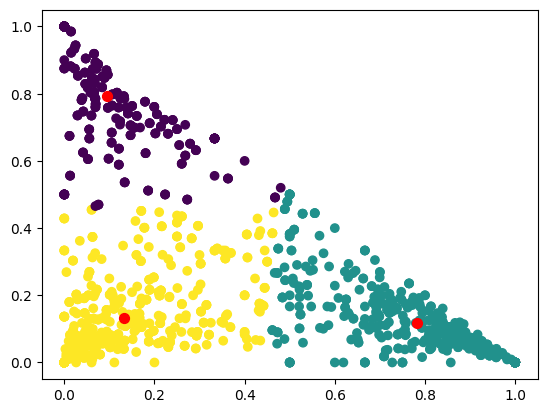

In [51]:
#plot centroids on p1 vs p2

plt.scatter(merged['p1'], merged['p2'], c=merged['kmeans_cluster'])

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [20]:
def get_euc_distance_point_to_centroid(point, centroid):
    return np.sqrt(np.sum((point - centroid)**2))

In [25]:
get_euc_distance_point_to_centroid(np.array([0, 0]), centroids[2])

0.18753636370573507

In [42]:
def get_distances_to_centroids(point, centroids):
    distances = []
    for centroid in centroids:
        distances.append(get_euc_distance_point_to_centroid(point, centroid))
    return sorted(distances)

In [26]:
def assign_point_to_cluster(point, centroids):
    distances = []
    for centroid in centroids:
        distances.append(get_euc_distance_point_to_centroid(point, centroid))
    return np.argmin(distances)

In [29]:
assign_point_to_cluster(np.array([0, 1]), centroids)

0

In [31]:
def get_other_clusters_for_point(point, centroids):
    distances = []
    for centroid in centroids:
        distances.append(get_euc_distance_point_to_centroid(point, centroid))
    return np.argsort(distances)[1:]

In [32]:
get_other_clusters_for_point(np.array([0, 1]), centroids)

array([2, 1])

In [46]:
distances = get_distances_to_centroids(np.array([0, 0]), centroids)
sum(distances[1:])


1.5900421197888304

In [82]:
# Run DBSCAN on p1 and p2
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = merged[['p1', 'p2']].values
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.02, min_samples=10).fit(X)

labels = db.labels_

merged['dbscan_cluster'] = labels

merged.head()

,count,p1,p2,p3,transcript_id,cluster,kmeans_cluster,dbscan_cluster
0,1,0.719902,0.164619,0.115479,NaN,0,1,-1
1,2,0.932584,0.048689,0.018727,NaN,0,1,-1
2,3,0.629630,0.148148,0.222222,NaN,0,1,-1
3,4,0.982063,0.008969,0.008969,NaN,0,1,-1
4,5,0.990991,0.009009,0.000000,NaN,0,1,-1


In [86]:
dbscan = DBSCAN(eps=0.1, min_samples=5)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(merged[['p1', 'p2']])

# Filter out points labeled as outliers (-1 in DBSCAN)
merged['dbscan_cluster'] = labels
merged.size



11600

In [89]:
outlierless_df = merged[merged['dbscan_cluster'] != -1]
outlierless_df.size

11600

In [85]:
merged['dbscan_cluster'].value_counts()

dbscan_cluster
0    1450
Name: count, dtype: int64

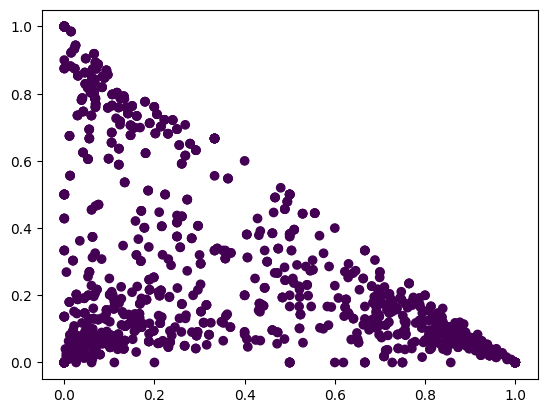

In [84]:
outlierless_df.dbscan_cluster.value_counts()

# plot p1 vs p2 with dbscan cluster

plt.scatter(outlierless_df['p1'], outlierless_df['p2'], c=outlierless_df['dbscan_cluster'])

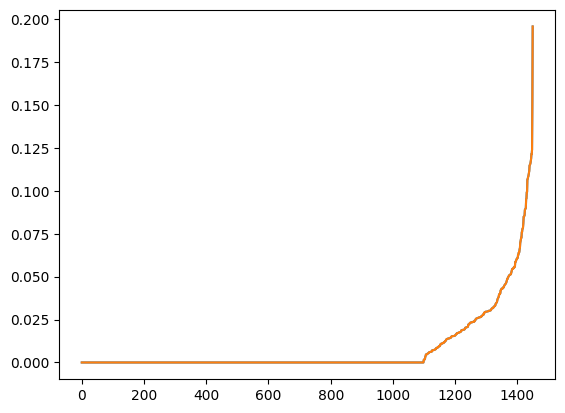

In [81]:
# generate k-distance plot

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X) 
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

# plot p1 vs p2 with dbscan cluster and k-distance plot

plt.plot(distances)

In [63]:
representative_centroids

,count,p1,p2,p3,transcript_id,cluster,kmeans_cluster
dbscan_cluster,,,,,,,
0,75.102759,0.346685,0.297389,0.355925,NaN,0.0,1.14


In [56]:
# get centroids of clusters and plot
centroids = merged.groupby('dbscan_cluster').mean()[['p1', 'p2']].values




TypeError: agg function failed [how->mean,dtype->object]